In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

#1. Load the processed dataset
df = pd.read_csv('../data/processed_churn_data.csv')

#2. Separate Features (X) and Target (y)
# y = Target variable (Churn)
y = df['Churn']

# X = Feature Matrix (All data used to make the prediction, excluding the target)
X = df.drop('Churn', axis=1)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

#3. Split data into Training and Testing sets
# 80-20 split. 
# - Training set (80%) (with Cross-Validation later)
# - Testing set (20%)
# random_state=42 ensures reproducibility (we get the same split every time we run this)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Features (X) shape: (7043, 30)
Target (y) shape: (7043,)

Training set size: 5634 samples
Testing set size: 1409 samples


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#1. Initialize the model
model = LogisticRegression(max_iter=1000)

#2. Train
print("Training the model...")
model.fit(X_train, y_train)

#3. Test
y_pred = model.predict(X_test)

#4. Evaluate
print("MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
# [TN, FP]
# [FN, TP]
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Training the model...
MODEL PERFORMANCE:
Accuracy: 0.8219

Confusion Matrix:
[[934 102]
 [149 224]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. Initialize the Random Forest model
# n_estimators=100: The forest will consist of 100 decision trees
# random_state=42: Ensures reproducible results
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#2. Train
print("Training Random Forest...")
rf_model.fit(X_train, y_train)

#3. Test
y_pred_rf = rf_model.predict(X_test)

#4. Evaluate
print("RANDOM FOREST PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

print("\nConfusion Matrix:")
# [TN, FP]
# [FN, TP]
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Training Random Forest...
RANDOM FOREST PERFORMANCE:
Accuracy: 0.7850

Confusion Matrix:
[[943  93]
 [210 163]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1036
           1       0.64      0.44      0.52       373

    accuracy                           0.78      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [ ]:
#1. Initialize Random Forest with Class Balancing
# class_weight=balanced: Automatically adjusts weights inversely proportional to class frequencies
# max_depth=10: Limits the tree depth to prevent overfitting 
rf_model_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', max_depth=10, random_state=42)

#2. Train
print("Training Balanced Random Forest...")
rf_model_balanced.fit(X_train, y_train)

#3. Test
y_pred_balanced = rf_model_balanced.predict(X_test)

#4. Evaluate
print("BALANCED RANDOM FOREST PERFORMANCE")
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")

print("\nConfusion Matrix:")
# [TN, FP]
# [FN, TP]
print(confusion_matrix(y_test, y_pred_balanced))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

Training Balanced Random Forest...
BALANCED RANDOM FOREST PERFORMANCE
Accuracy: 0.7864

Confusion Matrix:
[[822 214]
 [ 87 286]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.79      0.85      1036
           1       0.57      0.77      0.66       373

    accuracy                           0.79      1409
   macro avg       0.74      0.78      0.75      1409
weighted avg       0.82      0.79      0.79      1409



C:\Users\kamil\AppData\Local\Temp\ipykernel_13036\2376255405.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


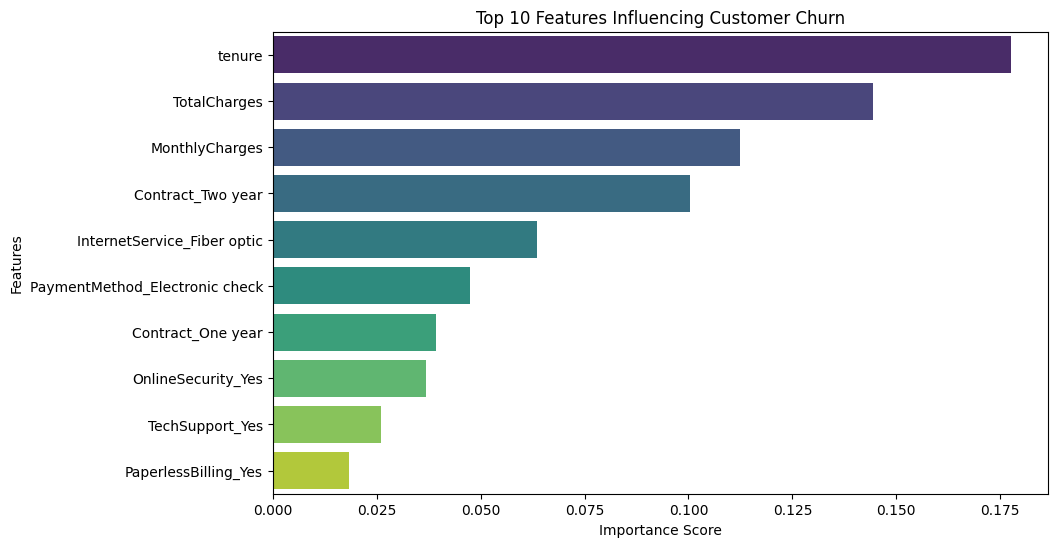

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Get feature importances from the trained model
importances = rf_model_balanced.feature_importances_

#2. Create a DataFrame for visualization
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

#3. Sort by importance (highest on top)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

#4. Plot the Top 10 Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Features Influencing Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [7]:
#1. Install LightGBM
%pip install lightgbm -q

import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#2. Initialize LightGBM
# is_unbalance=True: Crucial, it tells the model to weight the minority class (Churn) higher.
lgbm_model = lgb.LGBMClassifier(is_unbalance=True, random_state=42, verbose=-1)

#3. Train
print("Training LightGBM...")
lgbm_model.fit(X_train, y_train)

#4. Test
y_pred_lgbm = lgbm_model.predict(X_test)

#5. Evaluate
print("LIGHTGBM PERFORMANCE")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")

print("\nConfusion Matrix:")
# [TN, FP]
# [FN, TP]
print(confusion_matrix(y_test, y_pred_lgbm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgbm))

Note: you may need to restart the kernel to use updated packages.
Training LightGBM...
LIGHTGBM PERFORMANCE
Accuracy: 0.7729

Confusion Matrix:
[[798 238]
 [ 82 291]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409



In [8]:
#1. Install XGBoost
%pip install xgboost -q

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#2. Calculate Class Weight 
# XGBoost uses 'scale_pos_weight' instead of class_weight='balanced'
# Formula: Count(Loyal Customers) / Count(Churn Customers)
count_loyal = (y_train == 0).sum()
count_churn = (y_train == 1).sum()
scale_pos_weight = count_loyal / count_churn

#3. Initialize XGBoost
# scale_pos_weight: Helps the model focus on the minority class (Churn)
# eval_metric='logloss': Prevents warnings in newer versions
xgb_model = xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss',use_label_encoder=False,random_state=42)

#4. Train
print("Training XGBoost...")
xgb_model.fit(X_train, y_train)

#5. Test
y_pred_xgb = xgb_model.predict(X_test)

#6. Evaluate
print("XGBOOST PERFORMANCE")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

print("\nConfusion Matrix:")
# [TN, FP]
# [FN, TP]
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Note: you may need to restart the kernel to use updated packages.
Training XGBoost...


c:\dev\churn-prediction-system\venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:46:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBOOST PERFORMANCE
Accuracy: 0.7764

Confusion Matrix:
[[834 202]
 [113 260]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1036
           1       0.56      0.70      0.62       373

    accuracy                           0.78      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.78      0.78      1409



Generating comparison plot...
Random Forest AUC: 0.8620
LightGBM AUC:    0.8535
XGBoost AUC:     0.8392


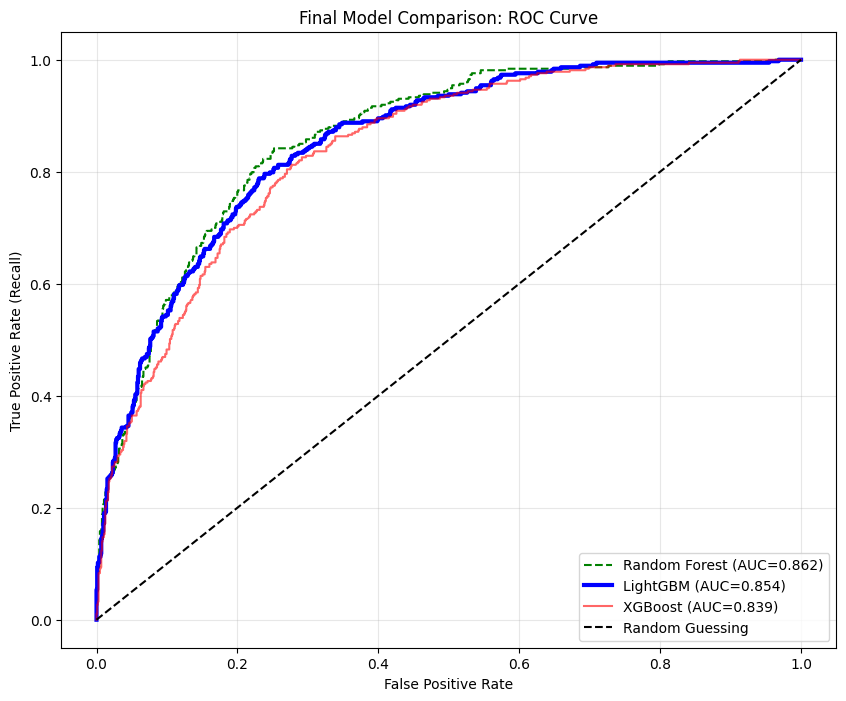

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#MODEL COMPARISON: ROC CURVE
print("Generating comparison plot...")

#1. Calculate probabilities for Class 1 (Churn) for all models
# Random Forest
y_prob_rf = rf_model_balanced.predict_proba(X_test)[:, 1]
# LightGBM
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
# XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# . Calculate Area Under Curve (AUC) scores
auc_rf = roc_auc_score(y_test, y_prob_rf)
auc_lgbm = roc_auc_score(y_test, y_prob_lgbm)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print(f"Random Forest AUC: {auc_rf:.4f}")
print(f"LightGBM AUC:    {auc_lgbm:.4f}")
print(f"XGBoost AUC:     {auc_xgb:.4f}")

#3. Plot the ROC Curves
plt.figure(figsize=(10, 8))

#Random Forest Plot
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.3f})', color='green', linestyle='--')

#LightGBM Plot
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_prob_lgbm)
plt.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC={auc_lgbm:.3f})', color='blue', linewidth=3)

#XGBoost Plot
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.3f})', color='red', alpha=0.6)

#Random Guess Baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

#Plot formatting
plt.title('Final Model Comparison: ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [10]:
import joblib
import os

#1. Select the winning model
# We chose Random Forest because it achieved the highest ROC-AUC score (0.8620)
# and offers great stability without excessive parameter tuning.
final_model = rf_model_balanced

#2. Create the 'models' directory if it doesn't exist already
if not os.path.exists('../models'):
    os.makedirs('../models')

#3. Prepare the data for saving
model_data = {
    'model': final_model,
    'features': X_train.columns.tolist()
}

#4. Save the model to a file using joblib
joblib.dump(model_data, '../models/churn_model.pkl')

print(f"The {type(final_model).__name__} model has been saved to 'models/churn_model.pkl'.")

The RandomForestClassifier model has been saved to 'models/churn_model.pkl'.
